In [1]:
import sys
sys.path.append('..')

In [2]:
from hearts_ai.rl.results import (
    load_training_results,
    PlotMakerPlaying,
    print_best_eval_run,
)

In [3]:
def log_path(name: str) -> str:
    return f'../output/logs/final_training/{name}'


def out_path(name: str) -> str:
    return f'../output/plots/final_training/{name}'

In [4]:
r_mctsrl = load_training_results(log_path=log_path('mctsrl_play_ppo_pass'))
r_ppo = load_training_results(log_path=log_path('ppo_both'))

# MCTS+RL Play & PPO Card Pass

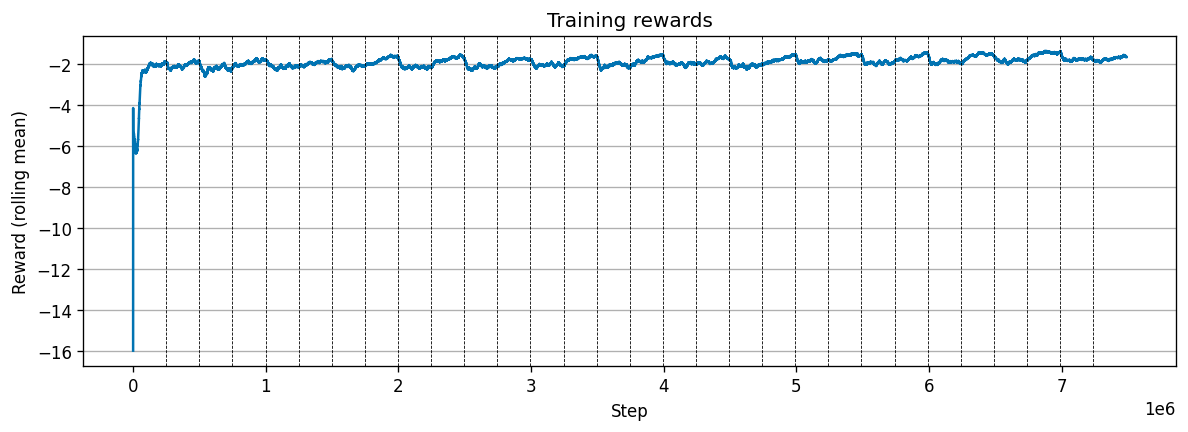

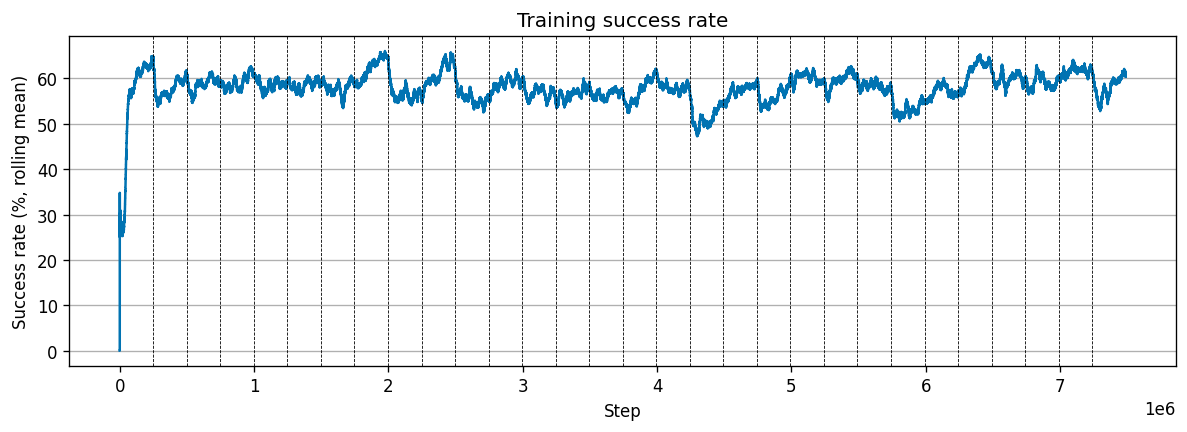

In [5]:
plot_maker_mctsrl = PlotMakerPlaying(r_mctsrl, folder=out_path('mctsrl_play_ppo_pass'), show=True)
plot_maker_mctsrl.plot_training()

# PPO Both Play & Card Pass

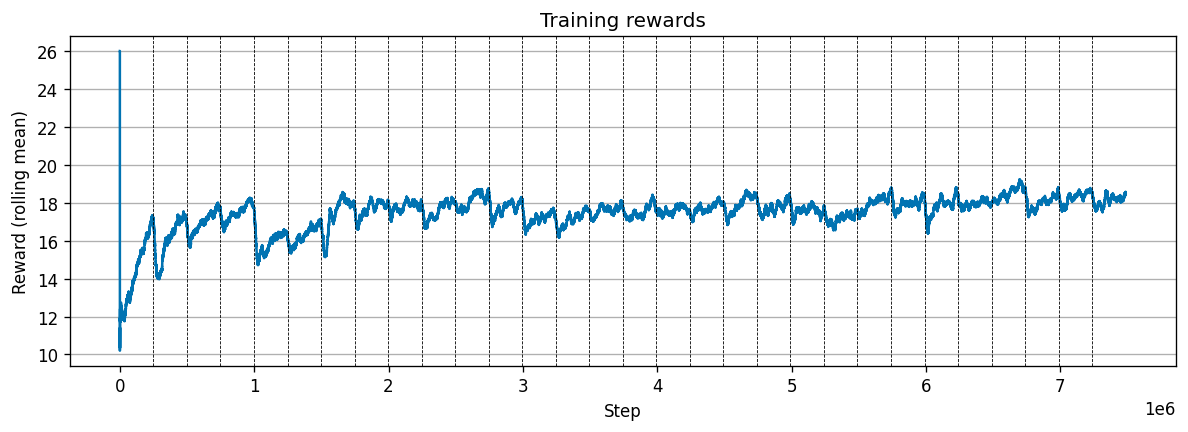

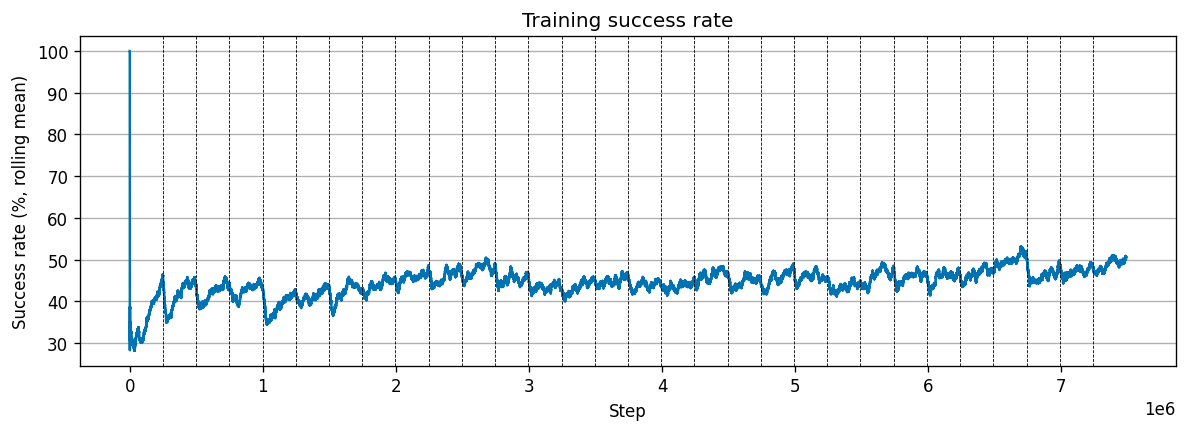

In [6]:
plot_maker_ppo = PlotMakerPlaying(r_ppo, folder=out_path('ppo_both'), show=True)
plot_maker_ppo.plot_training()

# Comparison

In [7]:
plot_maker_compare = PlotMakerPlaying(
    results={
        'MCTS+RL Play & PPO Card Pass': r_mctsrl,
        'PPO Both Play & Card Pass': r_ppo,
    },
    folder=out_path('comparison'),
    show=True,
)

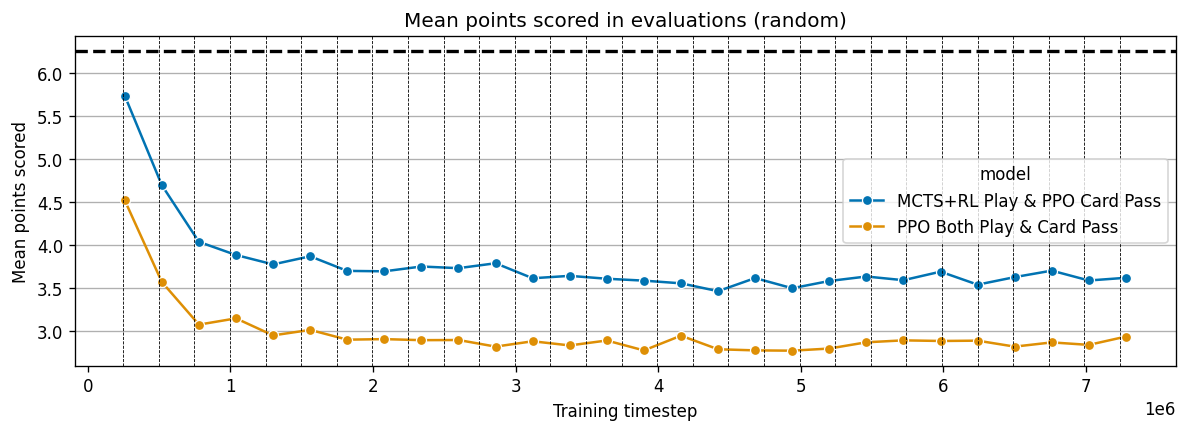

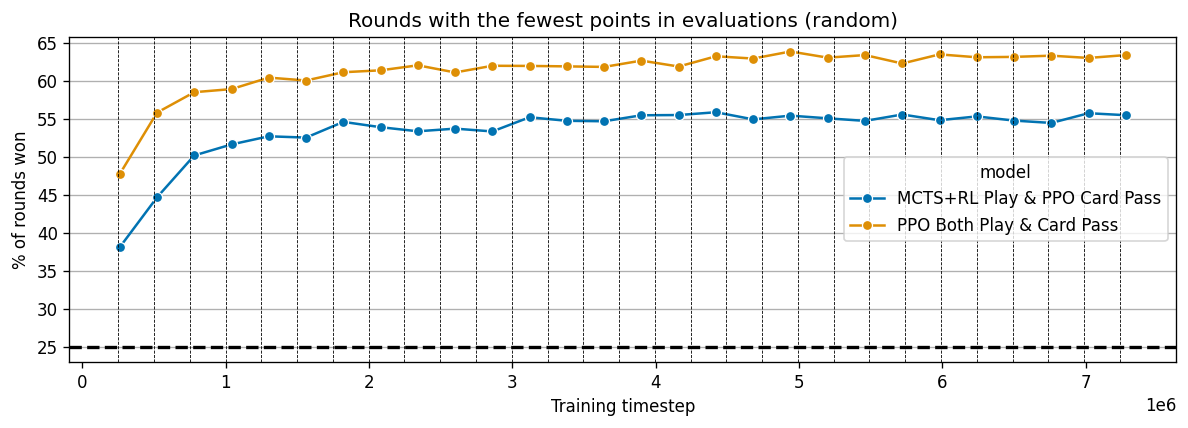

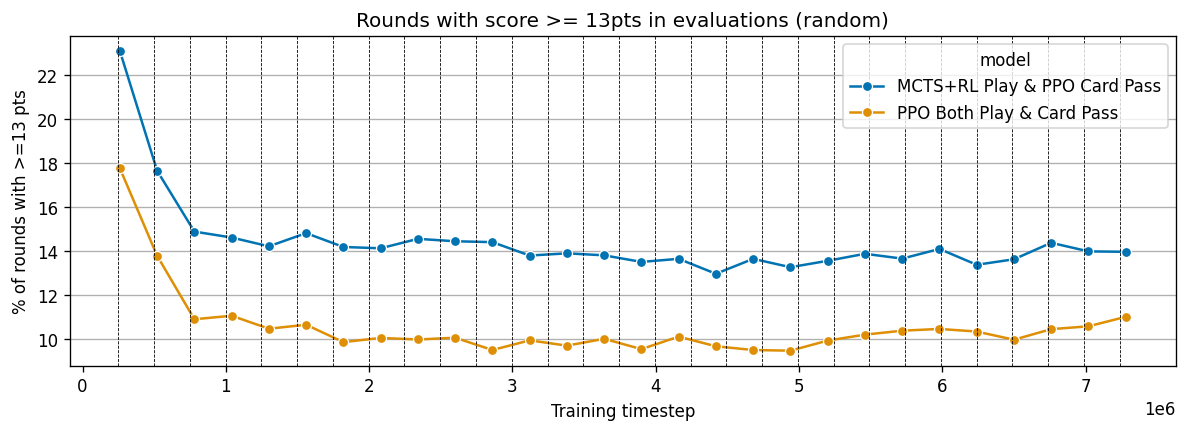

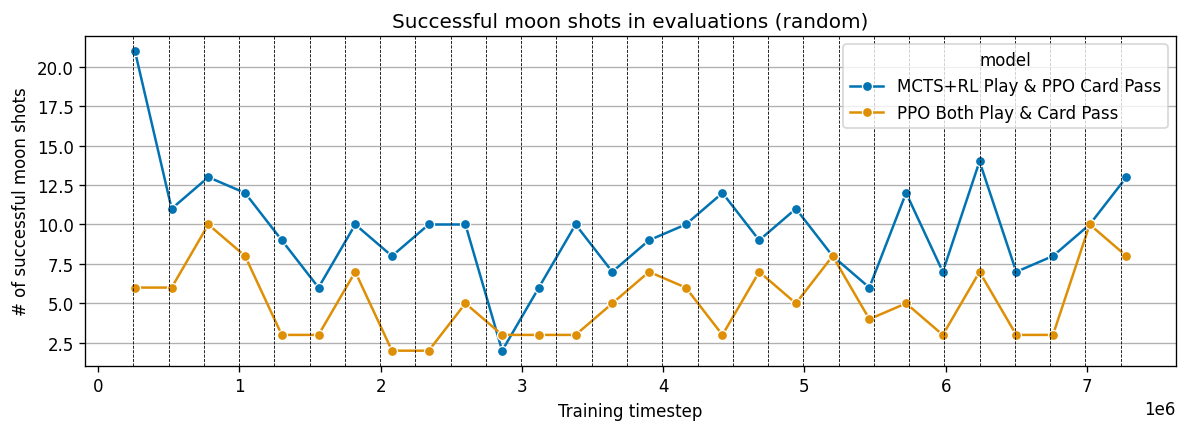

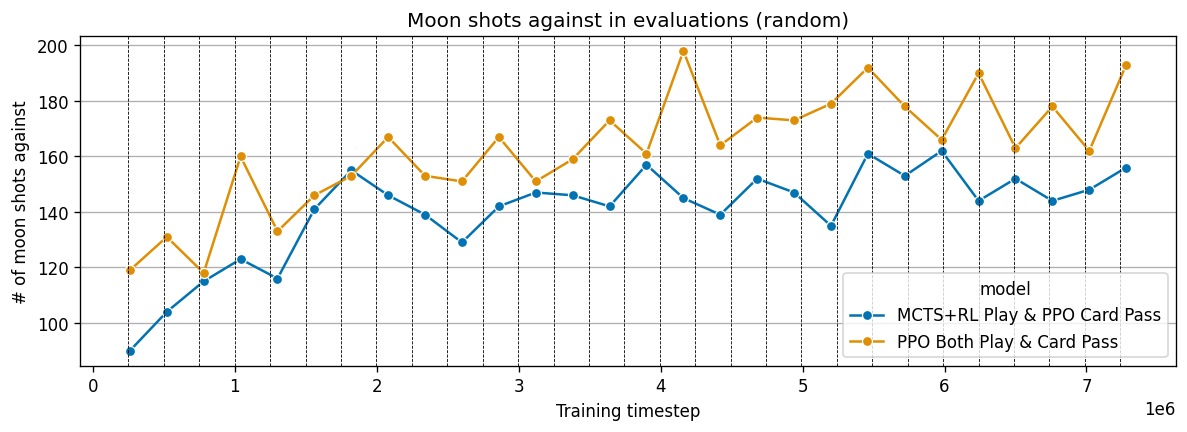

In [8]:
plot_maker_compare.plot_eval('random')

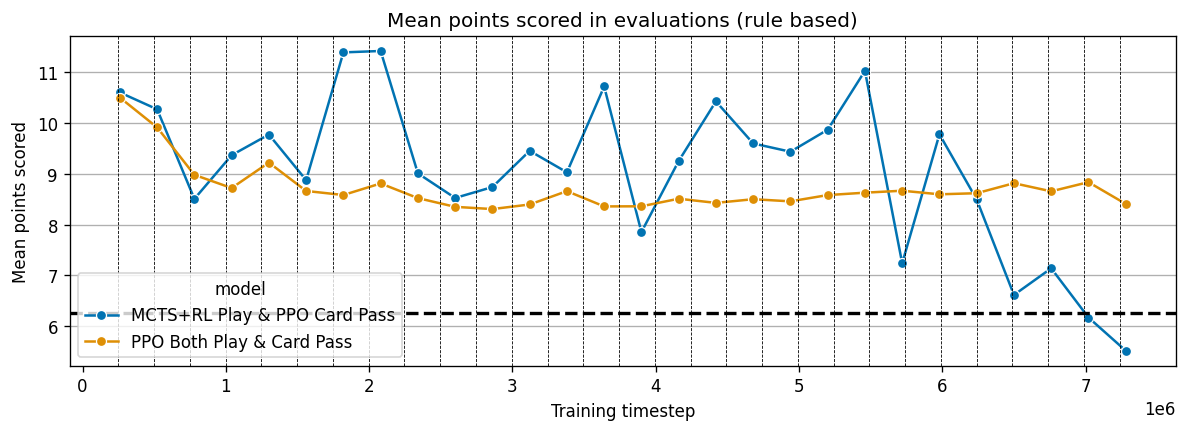

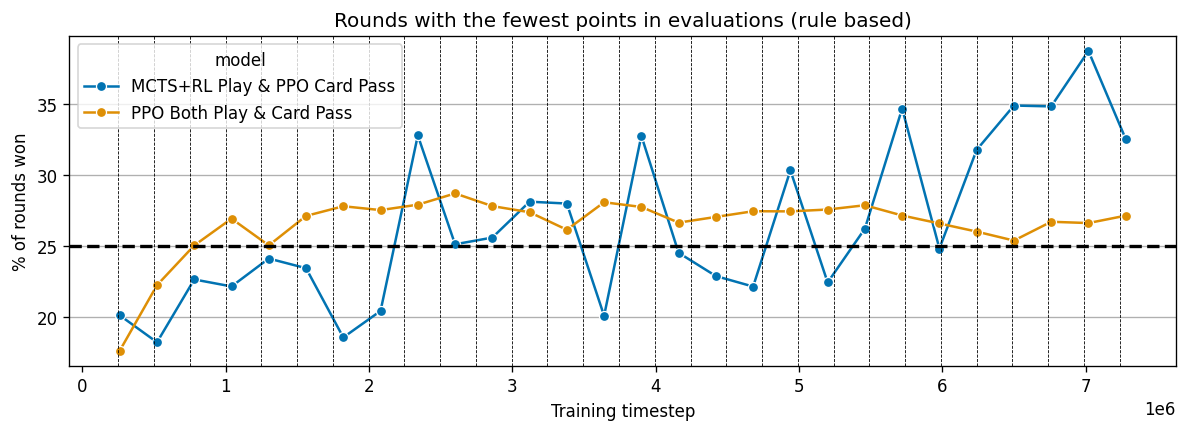

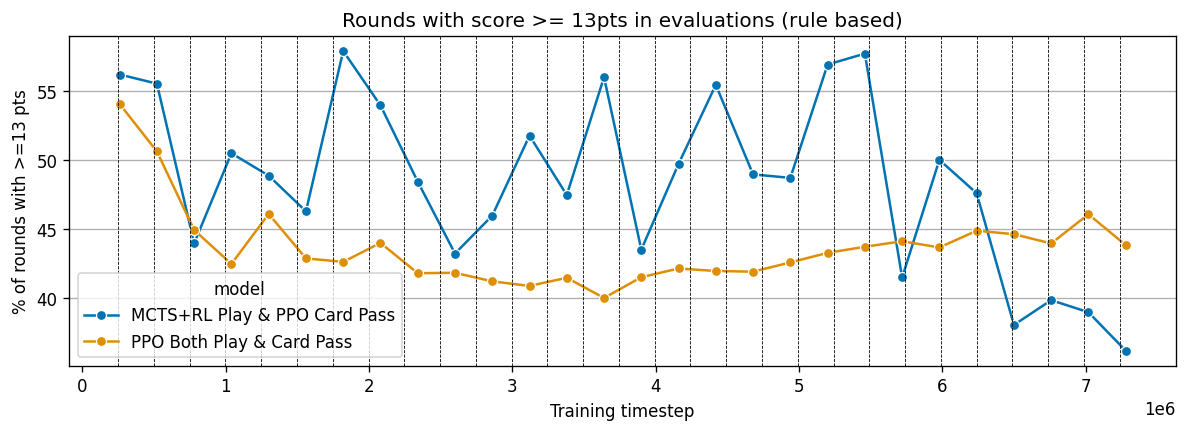

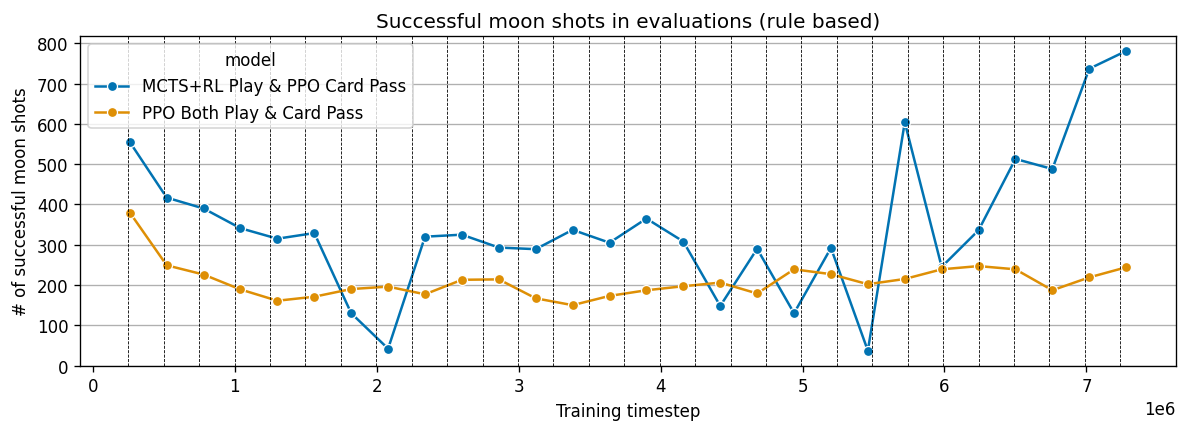

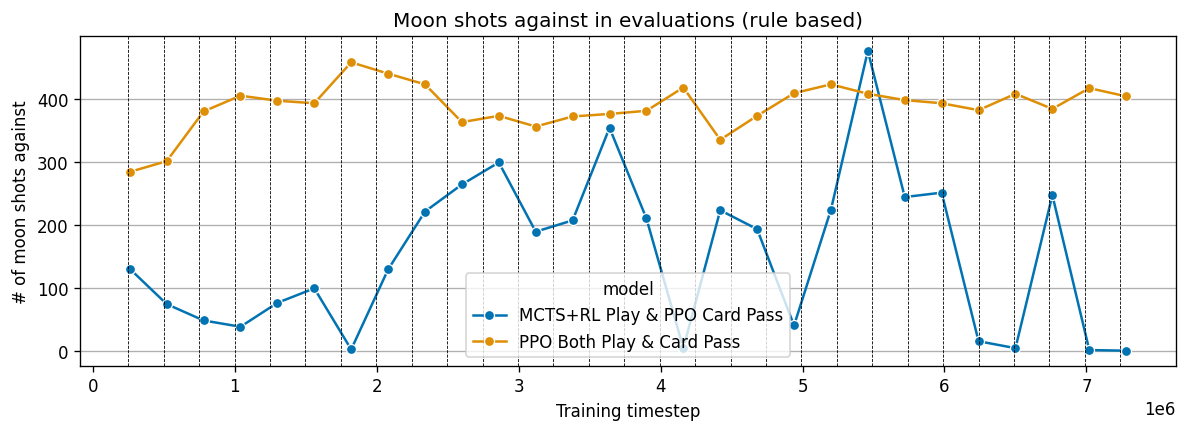

In [9]:
plot_maker_compare.plot_eval('rule_based')

# Identify the agents to be used in final evaluation

In [10]:
print_best_eval_run(r_mctsrl, eval_id='rule_based')

The best evaluation occurred during 'run_1'
eval_no=28 | train_timestep=7280000
episode_reward=-5.52 +/- 11.81)


In [11]:
print_best_eval_run(r_ppo, eval_id='rule_based')

The best evaluation occurred during 'run_1'
eval_no=11 | train_timestep=2860000
episode_reward=-8.31 +/- 9.63)
